In [ ]:
!pip install torch
!git clone https://github.com/CorentinJ/Real-Time-Voice-Cloning.git
%cd Real-Time-Voice-Cloning
!pip install numpy==1.22.3

In [ ]:
# remove numpy from req file before run
!pip install -r requirements.txt

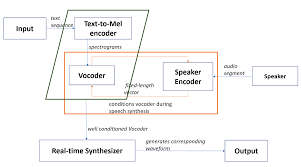

In [ ]:
import sys
from pathlib import Path
import librosa
from IPython.display import Audio
import soundfile as sf
import numpy as np
!pip install Unidecode


sys.path.append('Real-Time-Voice-Cloning/')  # Adjust based on actual path
!mkdir -p encoder/saved_models
!mkdir -p synthesizer/saved_models
!mkdir -p vocoder/saved_models

!gdown --id '1hoFzOhkAA_FMLxZujFma00Cj4cR1fmTL' -O encoder/saved_models/encoder.pt
!gdown --id '19DGdDixWUAzzF88aNd1FL3wQngtzdnry' -O synthesizer/saved_models/synthesizer.pt
!gdown --id '1lc--7GQqlL7uJ5GC2ulJL4H6n9mZF4Pq' -O vocoder/saved_models/vocoder.pt
from encoder import inference as encoder
from synthesizer.inference import Synthesizer
from vocoder import inference as vocoder

# Load models (paths might need to be adjusted based on where you've stored them)
encoder.load_model(Path('/content/encoder/saved_models/encoder.pt'))
synthesizer = Synthesizer(Path('/content/synthesizer/saved_models/synthesizer.pt'))
vocoder.load_model(Path('/content/vocoder/saved_models/vocoder.pt'))

# Function to clone voice
def clone_voice(text, source_audio):
    """
    Clone voice from source audio to generate text.
    """
    # Preprocess the source audio
    preprocessed_wav = encoder.preprocess_wav(source_audio)

    # Encode the source audio to get the embedding
    original_wav, sampling_rate = librosa.load(source_audio)
    embed = encoder.embed_utterance(preprocessed_wav)

    # Synthesize the speech
    specs = synthesizer.synthesize_spectrograms([text], [embed])
    generated_wav = vocoder.infer_waveform(specs[0])

    # Adjust the sample rate
    generated_wav = np.pad(generated_wav, (0, synthesizer.sample_rate), mode="constant")

    return generated_wav

# Example usage
text_to_clone = "This  is the test to see the quality of the AI voice version."
source_audio_path = "/content/oh-yeah-everything-is-fine.wav"

cloned_voice = clone_voice(text_to_clone, source_audio_path)

# Save or process the cloned voice further...
sampling_rate = 16000

# Convert the NumPy array to an audio file
sf.write('cloned_voice.wav', cloned_voice, sampling_rate)

# Use IPython.display.Audio to play the sound
Audio('cloned_voice.wav')